# Displacements due to pressure variations in reservoir

This code aims at reproducing the results presented by Tempone et al. (2010, figs 5a and 5b)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker

In [2]:
import compaction as cp

In [28]:
# Define the model
model1 = cp.prism_layer_circular((0,0), 500, (20,20), 850, 800)

In [29]:
model2 = cp.prism_layer_circular((0,0), 500, (20,20), 800, 750)

In [30]:
model = np.vstack([model1, model2])

In [31]:
model.shape

(632, 6)

In [32]:
# Pressure variation (in MPa)
DP = np.zeros(len(model)) - 10

In [33]:
# Young’s modulus (in MPa)
young = 3300

# Poisson coefficient
poisson = 0.25

In [34]:
cp.Cm(poisson, young)

0.0002525252525252525

### Coordinates on the plane y = 0 m

In [35]:
# Define computation points on vertical plane at y = 0m
shape = (150, 60)
x = np.linspace(-1500, 1500, shape[0])
z = np.linspace(0, 1200, shape[1])
x, z = np.meshgrid(x, z)
x = x.ravel()
z = z.ravel()
y = np.zeros_like(x)
coordinates = np.vstack([y, x, z])

In [36]:
coordinates.shape

(3, 9000)

### Compute the displacement components on plane y = 0 m

In [37]:
# Compute the x-component
u_x1 = cp.displacement(coordinates, model, DP, poisson, young, field='u_x1_NA')

u_x2 = cp.displacement(coordinates, model, DP, poisson, young, field='u_x2_NA')

u_xz2 = cp.displacement(coordinates, model, DP, poisson, young, field='u_xz2_NA')

u_x = u_x1 + (3 - 4*poisson)*u_x2 + u_xz2

In [38]:
# Compute the y-component
u_y1 = cp.displacement(coordinates, model, DP, poisson, young, field='u_y1_NA')

u_y2 = cp.displacement(coordinates, model, DP, poisson, young, field='u_y2_NA')

u_yz2 = cp.displacement(coordinates, model, DP, poisson, young, field='u_yz2_NA')

u_y = u_y1 + (3 - 4*poisson)*u_y2 + u_yz2

In [39]:
# Compute the z-component
u_z1 = cp.displacement(coordinates, model, DP, poisson, young, field='u_z1_NA')

u_z2 = cp.displacement(coordinates, model, DP, poisson, young, field='u_z2_NA')

u_zz2 = cp.displacement(coordinates, model, DP, poisson, young, field='u_zz2_NA')

u_z = u_z1 - (3 - 4*poisson)*u_z2 + u_zz2

In [40]:
# horizontal component
u_horizontal = np.sqrt(u_x**2 + u_y**2)

### Plot the results on plane y = 0 m

In [41]:
x = np.linspace(-1500, 1500, shape[0])
z = np.linspace(0, 1200, shape[1])

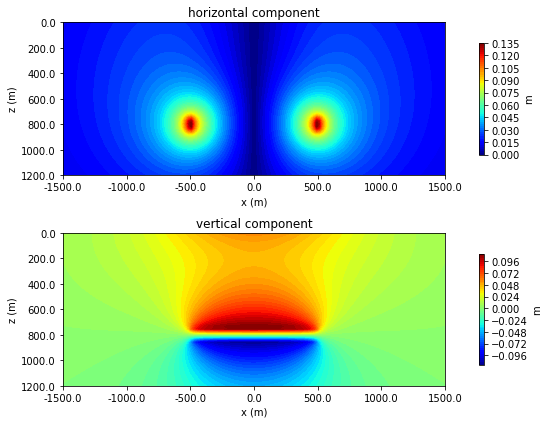

In [42]:
# Plot the results on a map
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(12,6))

ax[0].set_aspect("equal")
# Get the maximum absolute value so we can center the colorbar on zero
# maxabs = np.max(np.abs(u_horizontal))
# img = ax[0].contourf(x, z, u_horizontal.reshape(shape[::-1]), 
#                   60, vmin=-maxabs, vmax=maxabs, cmap="seismic")
img = ax[0].contourf(x, z, u_horizontal.reshape(shape[::-1]), 
                  60, cmap="jet")
plt.colorbar(img, ax=ax[0], pad=0.04, shrink=0.73, label="m")
ax[0].set_title("horizontal component")

ax[0].set_xticklabels(ax[0].get_xticks())
ax[0].set_yticklabels(ax[0].get_yticks())
ax[0].invert_yaxis()
ax[0].set_xlabel("x (m)")
ax[0].set_ylabel("z (m)")

ax[1].set_aspect("equal")
# Get the maximum absolute value so we can center the colorbar on zero
# maxabs = np.max(np.abs(u_z))
# img = ax[1].contourf(x, z, u_z.reshape(shape[::-1]),  
#                   60, vmin=-maxabs, vmax=maxabs, cmap="seismic")
img = ax[1].contourf(x, z, u_z.reshape(shape[::-1]),  
                  60, cmap="jet")
plt.colorbar(img, ax=ax[1], pad=0.04, shrink=0.73, label="m")
ax[1].set_title("vertical component")

ax[1].set_xticklabels(ax[1].get_xticks())
ax[1].set_yticklabels(ax[1].get_yticks())
ax[1].invert_yaxis()
ax[1].set_xlabel("x (m)")
ax[1].set_ylabel("z (m)")

plt.tight_layout()
plt.show()

### Coordinates along a well located at edge of the reservoir

In [61]:
# Define computation points
z = np.linspace(0, 1200, 100)
x = np.zeros_like(z) + 500
y = np.zeros_like(z)
coordinates = np.vstack([y, x, z])

### Compute the displacement components along a well located at edge of the reservoir

In [62]:
# Compute the x-component
u_x1 = cp.displacement(coordinates, model, DP, poisson, young, field='u_x1_NA')

u_x2 = cp.displacement(coordinates, model, DP, poisson, young, field='u_x2_NA')

u_xz2 = cp.displacement(coordinates, model, DP, poisson, young, field='u_xz2_NA')

u_x = u_x1 + (3 - 4*poisson)*u_x2 + u_xz2

In [63]:
# Compute the y-component
u_y1 = cp.displacement(coordinates, model, DP, poisson, young, field='u_y1_NA')

u_y2 = cp.displacement(coordinates, model, DP, poisson, young, field='u_y2_NA')

u_yz2 = cp.displacement(coordinates, model, DP, poisson, young, field='u_yz2_NA')

u_y = u_y1 + (3 - 4*poisson)*u_y2 + u_yz2

In [64]:
# Compute the z-component
u_z1 = cp.displacement(coordinates, model, DP, poisson, young, field='u_z1_NA')

u_z2 = cp.displacement(coordinates, model, DP, poisson, young, field='u_z2_NA')

u_zz2 = cp.displacement(coordinates, model, DP, poisson, young, field='u_zz2_NA')

u_z = u_z1 - (3 - 4*poisson)*u_z2 + u_zz2

### Plot the results along the well

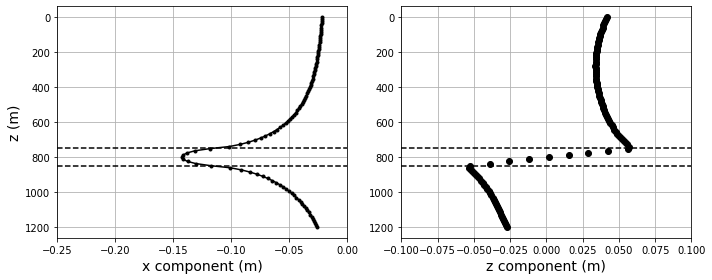

In [65]:
# Plot the results on a map
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(10,4))

ax[0].plot(u_x, z, 'k.-')
ax[0].plot([-0.25, 0], [750, 750], 'k--')
ax[0].plot([-0.25, 0], [850, 850], 'k--')
ax[0].set_xlim(-0.25, 0)
ax[0].invert_yaxis()
ax[0].set_xlabel("x component (m)", fontsize=14)
ax[0].set_ylabel("z (m)", fontsize=14)
ax[0].grid()

ax[1].plot(u_z, z, 'ko')
ax[1].plot([-0.1, 0.1], [750, 750], 'k--')
ax[1].plot([-0.1, 0.1], [850, 850], 'k--')
ax[1].set_xlim(-0.1, 0.1)
ax[1].invert_yaxis()
ax[1].set_xlabel("z component (m)", fontsize=14)
#ax[1].set_ylabel("z (m)")
ax[1].grid()

plt.tight_layout()
plt.show()

### Coordinates along at the top, center and bottom of the cylindrical reservoir

In [48]:
# Define computation points
z_top = np.zeros(100) + 750
z_center = np.zeros(100) + 800
z_bottom = np.zeros(100) + 850
x = np.linspace(0, 600, 100)
y = np.zeros_like(x)
coordinates_top = np.vstack([y, x, z_top])
coordinates_center = np.vstack([y, x, z_center])
coordinates_bottom = np.vstack([y, x, z_bottom])

### Compute the displacement components

In [49]:
# Compute the x-component at the top
u_x1_top = cp.displacement(coordinates_top, model, DP, poisson, young, field='u_x1_NA')

u_x2_top = cp.displacement(coordinates_top, model, DP, poisson, young, field='u_x2_NA')

u_xz2_top = cp.displacement(coordinates_top, model, DP, poisson, young, field='u_xz2_NA')

u_x_top = u_x1_top + (3 - 4*poisson)*u_x2_top + u_xz2_top

In [50]:
# Compute the z-component at the top
u_z1_top = cp.displacement(coordinates_top, model, DP, poisson, young, field='u_z1_NA')

u_z2_top = cp.displacement(coordinates_top, model, DP, poisson, young, field='u_z2_NA')

u_zz2_top = cp.displacement(coordinates_top, model, DP, poisson, young, field='u_zz2_NA')

u_z_top = u_z1_top - (3 - 4*poisson)*u_z2_top + u_zz2_top

In [51]:
# Compute the x-component at the center
u_x1_center = cp.displacement(coordinates_center, model, DP, poisson, young, field='u_x1_NA')

u_x2_center = cp.displacement(coordinates_center, model, DP, poisson, young, field='u_x2_NA')

u_xz2_center = cp.displacement(coordinates_center, model, DP, poisson, young, field='u_xz2_NA')

u_x_center = u_x1_center + (3 - 4*poisson)*u_x2_center + u_xz2_center

In [52]:
# Compute the z-component at the center
u_z1_center = cp.displacement(coordinates_center, model, DP, poisson, young, field='u_z1_NA')

u_z2_center = cp.displacement(coordinates_center, model, DP, poisson, young, field='u_z2_NA')

u_zz2_center = cp.displacement(coordinates_center, model, DP, poisson, young, field='u_zz2_NA')

u_z_center = u_z1_center - (3 - 4*poisson)*u_z2_center + u_zz2_center

In [53]:
# Compute the x-component at the bottom
u_x1_bottom = cp.displacement(coordinates_bottom, model, DP, poisson, young, field='u_x1_NA')

u_x2_bottom = cp.displacement(coordinates_bottom, model, DP, poisson, young, field='u_x2_NA')

u_xz2_bottom = cp.displacement(coordinates_bottom, model, DP, poisson, young, field='u_xz2_NA')

u_x_bottom = u_x1_bottom + (3 - 4*poisson)*u_x2_bottom + u_xz2_bottom

In [54]:
# Compute the z-component at the bottom
u_z1_bottom = cp.displacement(coordinates_bottom, model, DP, poisson, young, field='u_z1_NA')

u_z2_bottom = cp.displacement(coordinates_bottom, model, DP, poisson, young, field='u_z2_NA')

u_zz2_bottom = cp.displacement(coordinates_bottom, model, DP, poisson, young, field='u_zz2_NA')

u_z_bottom = u_z1_bottom - (3 - 4*poisson)*u_z2_bottom + u_zz2_bottom

### Plot the results at the top, center and bottom of the reservoir

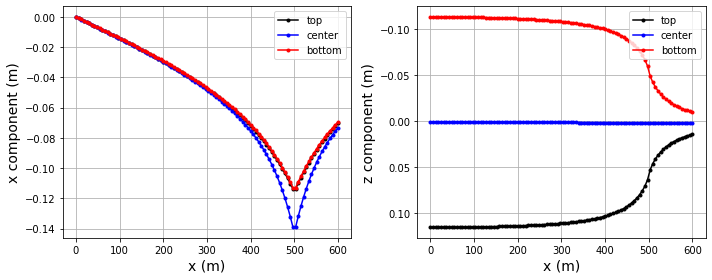

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(10,4))

ax[0].plot(x, u_x_top, 'k.-', label='top')
ax[0].plot(x, u_x_center, 'b.-', label='center')
ax[0].plot(x, u_x_bottom, 'r.-', label='bottom')
#ax[0].plot([-0.25, 0], [800, 800], 'k--')
#ax[0].set_xlim(-0.25, 0)
#ax[0].invert_yaxis()
ax[0].set_xlabel("x (m)", fontsize=14)
ax[0].set_ylabel("x component (m)", fontsize=14)
ax[0].grid()
ax[0].legend(loc='best')

ax[1].plot(x, u_z_top, 'k.-', label='top')
ax[1].plot(x, u_z_center, 'b.-', label='center')
ax[1].plot(x, u_z_bottom, 'r.-', label='bottom')
# ax[1].plot([-0.1, 0.1], [800, 800], 'k--')
# ax[1].plot([-0.1, 0.1], [900, 900], 'k--')
#ax[1].set_xlim(-0.1, 0.1)
ax[1].invert_yaxis()
ax[1].set_xlabel("x (m)", fontsize=14)
ax[1].set_ylabel("z component (m)", fontsize=14)
ax[1].grid()
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()